In [118]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.svm import LinearSVR
from sklearn.ensemble import AdaBoostRegressor
import math
from sklearn.metrics import mean_squared_error

In [119]:
dataset = pd.read_csv('real-gdp-per-capita.csv', index_col='Year', parse_dates=['Year'])


In [120]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 1950-01-01 to 2004-01-01
Data columns (total 2 columns):
Philippines    55 non-null float64
Thailand       55 non-null float64
dtypes: float64(2)
memory usage: 1.3 KB


In [121]:
dataset = dataset.drop(columns=['Philippines'])

In [122]:
training_set = dataset[:'1988'].iloc[:,:].values
test_set = dataset['1988':].iloc[:,:].values

In [123]:
len(training_set)

39

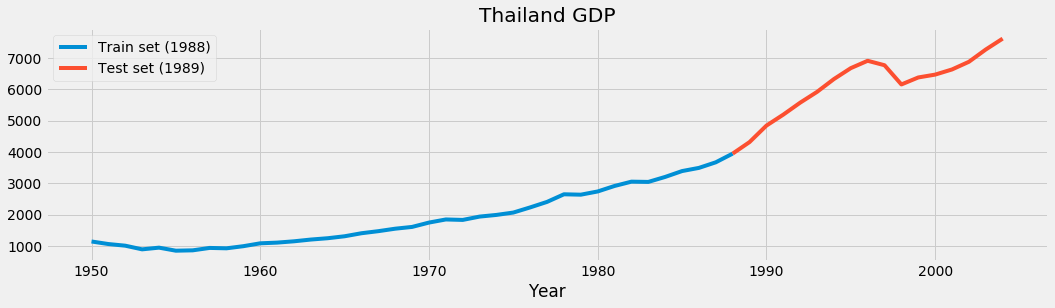

In [124]:
dataset['Thailand'][:'1988'].plot(figsize=(16,4), legend = True)
dataset['Thailand']['1988':].plot(figsize=(16,4), legend = True)
plt.legend(['Train set (1988)','Test set (1989)'])
plt.title('Thailand GDP')
plt.show()

In [125]:
X_train_th = []
y_train_th = []
for i in range(3,len(training_set)):
    X_train_th.append(training_set[i-3:i,0])
    y_train_th.append(training_set[i,0])                      
X_train_th, y_train_th = np.array(X_train_th), np.array(y_train_th)

In [126]:
X_train_th.shape

(36, 3)

__LinearSVR__

In [127]:
#The SVR Timeseries
reg_th = LinearSVR()
reg_th.fit(X_train_th, y_train_th) 

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [128]:
dataset_total_th = pd.concat((dataset[:'1988'],dataset['1988':]), axis = 0)
inputs_th = dataset_total_th[(len(dataset_total_th)-len(test_set)-2):].values
inputs_th.shape
                        

(19, 1)

In [129]:
X_test_th = []

for i in range(3,len(test_set)): 
    X_test_th.append(inputs_th[i-3:i,0])                   
X_test_th = np.array(X_test_th)

In [130]:
predicted_GDP = reg_th.predict(X_test_th)

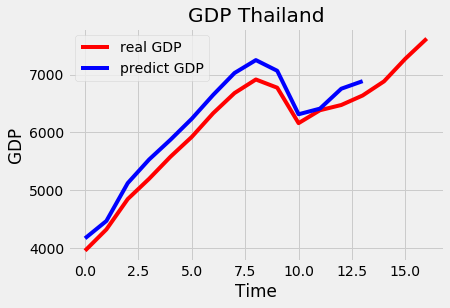

In [131]:
plt.plot(test_set, color = 'red', label = 'real GDP')
plt.plot(predicted_GDP, color = 'blue', label = 'predict GDP')
plt.title('GDP Thailand')
plt.xlabel('Time')
plt.ylabel('GDP')
plt.legend()
plt.show()

__GB__

In [138]:
#The Logitboost Timeseries
from sklearn.linear_model import LinearRegression

reg_th = AdaBoostRegressor(base_estimator = LinearRegression(),n_estimators=10000, loss = 'square')
reg_th.fit(X_train_th, y_train_th)
predicted_GDP = reg_th.predict(X_test_th)

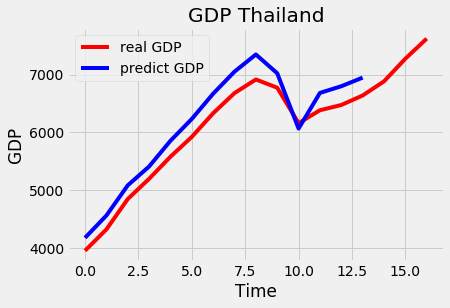

In [139]:
plt.plot(test_set, color = 'red', label = 'real GDP')
plt.plot(predicted_GDP, color = 'blue', label = 'predict GDP')
plt.title('GDP Thailand')
plt.xlabel('Time')
plt.ylabel('GDP')
plt.legend()
plt.show()